### Plot the phase space.
- The color code indicates different turn

In [1]:
import os
import sys
import numpy as np
from math import *
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import PyNAFF as pnf
import json

### Test that you have access to /afs

In [2]:
ls /afs/cern.ch/work/n/natriant/private

my_tracking_model_htcondor/  simulation_data_2018/  sixdesk/  workspaces/


### Plotting parameters

In [7]:
params = {'legend.fontsize': 20,
          'figure.figsize': (8, 7),
          'axes.labelsize': 25,
          'axes.titlesize': 21,
          'xtick.labelsize': 23,
          'ytick.labelsize': 23,
          'image.cmap': 'jet',
          'lines.linewidth': 1,
          'lines.markersize': 5,
          'font.family': 'sans-serif'}


plt.rc('text', usetex=False)
plt.rc('font', family='serif')
plt.rcParams.update(params)

### Import the parameters of the study
- Be careful to import the correct json file

In [4]:
data = {}
with open('./configuration_files/config_rate_vs_noise.json', "r") as read_file:
        data = json.load(read_file)
my_afs_path = '/afs/cern.ch/work/n/natriant/private/my_tracking_model_htcondor/tracking_data/'

### Define the name of the study

In [16]:
study_name = 'Qx62.78_ksi0.005_g0.200_delta1.000_betax115.75_particles15000_turns1000_v1'
df = pd.read_pickle(my_afs_path+study_name+'.pkl') 

### Plot motion of the beam

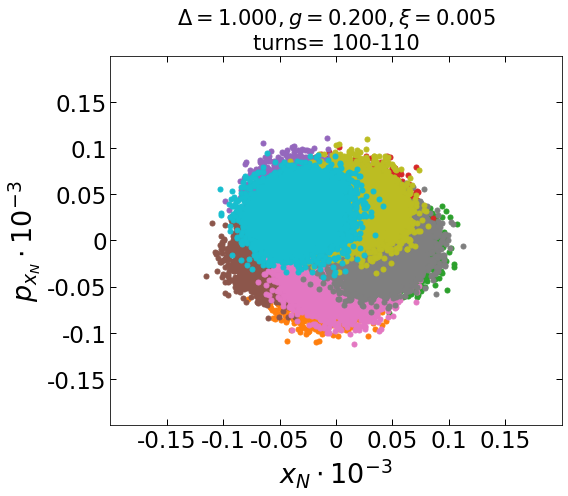

In [17]:
turn_start = 100
turn_stop = 110
step = 1 
Delta = 1.0
g=0.2
ksi = 0.005
fig, ax = plt.subplots(1,1,figsize=(8,7))
for turn in range(turn_start, turn_stop):
    #fig, ax = plt.subplots()
    ax.scatter(df.at[turn, 'x']/sqrt(data['machine_parameters']['beta_x'])*1e3, df.at[turn, 'px']*sqrt(data['machine_parameters']['beta_x'])*1e3)

    ax.set_xlabel(r'$x_N \cdot 10^{-3}$', fontsize =27)
    ax.set_ylabel(r'$p_{x_N} \cdot 10^{-3}$', fontsize =27)
    #plt.title(r'$\Delta=1.0, g={:.3f}, \xi={:.3f}$'.format(data['Feedback']['values_limits']['max'],data['BB']['values_limits']['max'])+'\n'+'$Q_x={}, turns={}-{}, N_b={}$'.format(data['machine_parameters']['Qx_init'], turn_start, turn_stop, data['study_parameters']['particles'] ))
    ax.set_title(r'$\Delta={:.3f}, g={:.3f}, \xi ={:.3f}$'.format(Delta, g, ksi)+'\n'+ 'turns= {}-{}'.format(turn_start, turn_stop))
    ax.set_xlim(-0.2, 0.2)
    ax.set_ylim(-0.2, 0.2)    

    

# Set the ticks in both sides of the axes
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')

# Set the current tick locations and labels of the x and y-axis.
y_ticks_list = [-0.15, -0.10, -0.05, 0, 0.05, 0.10, 0.15]
y_labels = [str(i) for i in y_ticks_list]
plt.yticks(y_ticks_list, y_labels)
x_ticks_list = [-0.15, -0.10, -0.05, 0, 0.05, 0.10, 0.15]
x_labels = [str(i) for i in x_ticks_list]
plt.xticks(x_ticks_list, x_labels)

# Set the appearance of the ticks
ax.tick_params(which='both',direction='in', width=1)
ax.tick_params(which='major',direction='in', length=6)


plt.tight_layout()
ax.set_aspect(aspect='auto')    
    
savefig = False
if savefig:
    plt.savefig('./figures/beam_motion_'+study_name+'.png')